<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "1" #@param {type:"string"}
Student_ID_Name = "20214537 Tom Keane" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import seaborn as sns

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [9]:
!pip install gpy

     |████████████████████████████████| 959 kB 2.7 MB/s 
     |████████████████████████████████| 71 kB 7.9 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565077 sha256=858635311f9e3c2dd00194c59fd2bf84db13350d73d72e5e1cb15d1a30d8887a
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=49e0d53c3b0b19e34fc16a3c60342b9128ecc07fca078862d2600d5c424e2054
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [11]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [12]:
def import_datasets(git_link = 'https://raw.githubusercontent.com/tomkeane07/AI-Projects-UL/Etivity3/semester3/MachineLearningApplications/E3/'):
  return {
      'Test'  : pd.read_csv(git_link+'HousePrice_Test.csv'),
      'Train' : pd.read_csv(git_link+'HousePrice_Train.csv'),
      'true_price'  : pd.read_csv(git_link+'sample_submission.csv')}
try:
  dbs
except:
  dbs = import_datasets()

dftest  =  dbs['Test' ]
dftrain =  dbs['Train']
dfcost = dbs['true_price']
dftest['Price'] = dfcost['Price']

df = dftrain.append(dftest)

In [13]:
display(dftrain.tail())

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
1633,1634,12424903,Blackrock,1,2,C2,Built in c.1930 38 Stradbrook Road is a deligh...,"Parking,Gas Fired Central Heating,Alarm,Wheelc...",Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,bungalow,64.00,500000
1634,1635,12383142,Blackrock,3,5,C1,An impressive three-story family home superbly...,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,detached,175.96,795000
1635,1636,12426975,Lucan,2,3,A3,DNG Lucan's leading estate agents are delighte...,NaN,None,53.351667,-6.435278,semi-detached,98.00,340000
1636,1637,12198921,Sandymount,8,8,D2,Holyrood Castle is a most distinctive 19th cen...,NaN,None,53.328997,-6.221030,detached,507.00,2500000
1637,1638,12314237,Shankill,2,2,E1,A superb opportunity awaits to acquire this be...,NaN,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,semi-detached,50.00,370000


In [14]:
display(dftest.tail())

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
697,2336,12392566,Kilmainham,1,1,G,Sherry FitzGerald is delighted to present 56 B...,NaN,Secure gated and well maintained development\n...,53.343377,-6.296654,apartment,40.0,3835888.0
698,2337,12352487,Stoneybatter,1,2,D2,26 Viking Road is a well presented and moderni...,NaN,Well presented and modernised extended two bed...,53.351074,-6.285557,terraced,57.0,1106700.0
699,2338,12387290,Cabinteely,1,3,D1,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....,"Parking,Gas Fired Central Heating",None,53.261710,-6.164979,semi-detached,93.0,1103343.0
700,2339,12382807,Clontarf,2,3,NaN,DNG are delighted to represent the sale of 109...,NaN,Gas fired central heating.\nFully renovated an...,53.360515,-6.189661,terraced,118.0,1273647.0
701,2340,12393769,Glenageary,1,3,F,This is an instantly appealing Jennings built ...,NaN,Drenched in natural light\nSuperb blank canvas...,53.280408,-6.132925,semi-detached,122.0,1820012.0


In [15]:
display(dftrain.describe())

print("\n\nmissing values _ %")
print(dftrain.isna().sum()* 100 / len(dftrain))
print("_________\nunique values")
print(dftrain.nunique(axis=0))

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06




missing values _ %
Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64
_________
unique values
Index            1638
ID               1638
Location          142
Num_Bathrooms      11
Num_Beds           11
BER_class          16
Description      1638
Services           31
Features         1118
Latitude         1604
Longitude        1605
Type               10
Surface           666
Price             267
dtype: int64


In [16]:
dropcols = ['Index', 'ID']

In [17]:
def inspect_data(df, dropcols):
  df = df.drop(df[dropcols], axis=1)

  sns.pairplot(data=df.dropna())
  plt.show()

  display(df.describe())
  
# inspect_data(dftrain, dropcols)

In [18]:
def print_text_col_examples(df):
  cols = df[['Description', 'Features', 'Services']].notna()
  print("Description")
  print(df[['Description']][cols].tail(5).values, end='\n\n')

  print('Features')
  print(df[['Features']][cols].tail(5).values, end="\n\n")

  print('Services')
  print(df[['Services']][cols].tail(5).values, end="\n\n")

print_text_col_examples(dftrain)

Description
[['Built in c.1930 38 Stradbrook Road is a delightful, 2-bedroom double fronted cottage of immense charm and character. The property has been tastefully upgraded by the present owner with no expense spared as a result the property comes to the market in walk-in condition. Viewing is highly recommended. The accommodation briefly comprises, hall, living room / kitchen, 2 bedrooms and large bathroom. Front garden with off street parking, extremely private low maintenance walled rear garden with garden shed.\n\nThe bustling town of Blackrock which needs no introduction is located just a short distance away with a host of speciality shops, restaurants and cafes. The DART at Seapoint and Blackrock are minutes away. The area is also very well serviced with several bus routes within close proximity, offering easy access to and from the city centre.']
 ["An impressive three-story family home superbly located Off Newtownpark Avenue in an area of utmost convenience this property consi

In [19]:
df.drop_duplicates(subset=['BER_class'])['BER_class']

0                       C3
1                       D1
2                       A3
3                       E1
7                      NaN
10                       G
11                      E2
15                      C2
16     SINo666of2006exempt
19                       F
24                      B2
27                      C1
36                      D2
63                      B3
146                     B1
184                     A2
800                     A1
Name: BER_class, dtype: object

In [20]:
def drop_cols(df, dropcols):
  print("dropping", end=" ")
  for col in dropcols:
    print(col, end=", ")
    df.drop(col, axis=1, inplace=True)
  print("...")
  return df

def col_to_colCount(df, col, divider):
  #this is designed for features and facilities to convert it to a rough count
  # of features, based on how they're typically listed in the df
  print("extracting "+col +"...")
  df[col] = df[col].fillna("")
  df[col+"_count"] = df[col].apply(lambda x: x.count(divider)+1)
  return df

def sort_Services(df, col):
  # Courtesy of Tim Hrisikos
  print(f"extracting {col}...")
  df[col] = df[col].fillna("")
  df = df.join(
      df[col].str.extractall('([^,]+)')[0].groupby(level=0).apply(pd.value_counts).unstack(fill_value=0).add_prefix('Service_')
      )
  df.drop('Services', axis=1, inplace=True)
  return df

BER_class_mapper = {
    #Thanks Nigel Portley
    "SINo666of2006exempt": 1,
    "A1": 2,
    "A2": 3,
    "A3": 4,
    "B1": 5,
    "B2": 6,
    "B3": 7,
    "C1": 8,
    "C2": 9,
    "C3": 10,
    "D1": 11,
    "D2": 12,
    "E1": 13,
    "E2": 14,
    "F": 15,
    "G": 16
}

def onehotencode(df, col, drop_first=True):
  print("one hot encoding " + col)
  return pd.get_dummies(df, columns=[col], 
                        dummy_na=True, 
                        drop_first=drop_first)

def remove_locations_outside_Ire(df):
  # Carlos Siqueira Do Amaral noticed that there are entries from outside of Ireland.
  # This fiunction removes locations outside of Ireland's lat/ long bounds
  print("removing locations outside of Ireland")
  long0, lat0, long1, lat1 = (-9.97708574059, 51.6693012559, -6.03298539878, 55.1316222195)
  return df.loc[(df['Longitude'] > long0) & (df['Latitude'] > lat0)  & (df['Longitude'] < long1) & (df['Latitude'] < lat1)]

def frame_coordinates_to_dublin_center(df):
  print("centering coordinates around dublin city center")
  dublat, dublong = 53.350140, -6.266155
  df['dist_from_dub_center'] = (df.Longitude - dublong)**2 +(df.Latitude - dublat)**2
  df['Latitude'] = df.Latitude - dublat
  df['Longitude'] = df.Longitude - dublong
  return df

def treat_data(df, dropcols = []):
  # dropping columns listed below
  try:
    df = drop_cols(df, dropcols)
  except:
    pass
  #filling values. Justifications outlined in Initial datasets inspection
  df['Surface'].fillna(df['Surface'].median(), inplace=True)
  df['Num_Bathrooms'].fillna(df['Num_Bathrooms'].median(), inplace=True)
  df['Num_Beds'].fillna(df['Num_Beds'].median(), inplace=True)
  #converting features. Justifications outlined in Initial datasets inspection
  df = sort_Services(df, 'Services')
  df['BER_class'] = df['BER_class'].replace(BER_class_mapper)
  df['BER_class'].fillna(df['BER_class'].mean(), inplace=True)
  df = onehotencode(df, 'Type', False)
  df.fillna(0,inplace=True)
  # a couple of extra columns added based on local features.
  df = remove_locations_outside_Ire(df)
  df = frame_coordinates_to_dublin_center(df)
  try:
    df = df[(df.price > 0)]
  except:
      pass
  return df

In [21]:
display(df.tail(0))

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price


In [22]:
df = treat_data(df, dropcols)

dropping Index, ID, ...
extracting Services...
one hot encoding Type
removing locations outside of Ireland
centering coordinates around dublin city center


Location                              0
Num_Bathrooms                         0
Num_Beds                              0
BER_class                             0
Description                           0
Features                              0
Latitude                              0
Longitude                             0
Surface                               0
Price                                 0
Service_Alarm                         0
Service_Gas Fired Central Heating     0
Service_Oil Fired Central Heating     0
Service_Parking                       0
Service_Wheelchair Access             0
Service_Wired for Cable Television    0
Type_apartment                        0
Type_bungalow                         0
Type_detached                         0
Type_duplex                           0
Type_end-of-terrace                   0
Type_semi-detached                    0
Type_site                             0
Type_studio                           0
Type_terraced                         0


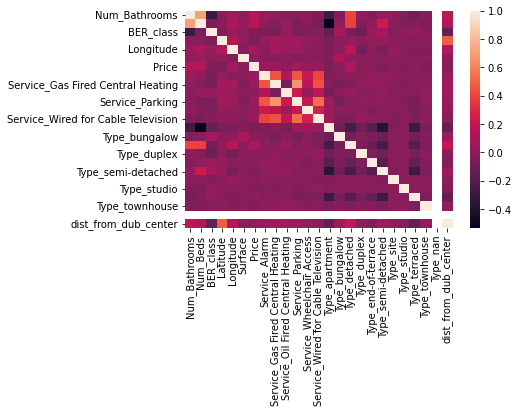

In [23]:
print(df.isna().sum())
display(sns.heatmap(df.corr()))

In [24]:
display(df.tail(2))

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Price,Service_Alarm,Service_Gas Fired Central Heating,Service_Oil Fired Central Heating,Service_Parking,Service_Wheelchair Access,Service_Wired for Cable Television,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,Type_nan,dist_from_dub_center
1636,Sandymount,8,8,12.0,Holyrood Castle is a most distinctive 19th cen...,None,-0.021143,0.045125,507.0,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0.002483
1637,Shankill,2,2,13.0,A superb opportunity awaits to acquire this be...,Turn key condition\nWood burning stove\nSlider...,-0.118702,0.141133,50.0,370000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0.034009


## Training & Test Data

In [116]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(df[['Price']],axis=1), df[['Price']], test_size=0.3)

### Expected Cost dataset

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

Description and Features are two columns which have potential for NLP. Though **Services** is also a text based feature, it is simply listing utilities availiable at each property, and does not illicit any descriptive or connotative language which would be useful for NLP.
Similarly **Location** not a useful column.

In [133]:
# your code here
nlp_df = df[['Description', 'Features', 'Price']]
nlp_df['Descr_Featu'] = df['Description']+ ' '+df['Features']

def remove_not_letters_from_col(df, col):
  df[col] = [re.sub('[^a-zA-Z]', ' ', phrase) for phrase in df[col]]
  return df

def list_of_words(df, col):
  return [sms.split() for sms in df[col]]


# function to normalize words
def normalize(words, stemmer, stop):
  normalized_words = list()
  for word in words:
    # remove  the most common words
    if word.lower() not in stop: 
      # stemming
      new_word = stemmer.stem(word) 
      # lower case
      normalized_words.append(new_word.lower()) 
  return normalized_words

def normalize_words(words):
  nltk.download('stopwords')
  stop = set(stopwords.words('english'))
  stemmer = SnowballStemmer('english', ignore_stopwords=False)
  return [normalize(word, stemmer, stop) for word in words]

def removing_stopwords_and_stemming(df, col):
  df = remove_not_letters_from_col(df, col)
  col_words = list_of_words(df, col)
  return df, col_words

def removing_short_words(df, col, short_word = 4):
  df[col] = df[col].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))
  return df

def update_col_with_normd_words(df, col, col_words_norm):
  df[col] = [" ".join(word) for word in col_words_norm]
  return df

def nlp_preprocessing(df, col):
  df, col_words = removing_stopwords_and_stemming(df, col)
  col_words_norm = normalize_words(col_words)
  df = update_col_with_normd_words(df, col, col_words_norm)
  df = removing_short_words(df, col)
  return df

In [134]:
# nlp_df = nlp_preprocessing(nlp_df, 'Description')

In [135]:
# nlp_df = nlp_preprocessing(nlp_df, 'Features')

In [136]:
nlp_df = nlp_preprocessing(nlp_df, 'Descr_Featu')
display(nlp_df['Descr_Featu'].tail())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1633    built stradbrook delight bedroom doubl front c...
1634    impress three stori famili superbl locat newto...
1635    lucan estat agent delight present esker bedroo...
1636    holyrood castl distinct centuri storey basemen...
1637    superb opportun await acquir beauti bijou cott...
Name: Descr_Featu, dtype: object

## [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- Convert a collection of raw documents to a matrix of TF-IDF features.

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek 

vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)
# print(vectorizer)
X = vectorizer.fit_transform(nlp_df['Descr_Featu'])
y = nlp_df['Price']
smk= SMOTETomek()



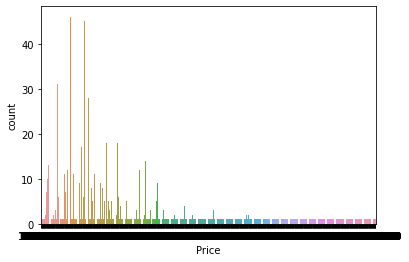

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# X_bal, y_bal = smk.fit_sample(X, y)
display(sns.countplot(y))

In [141]:
# create a model
MNB = MultinomialNB()

# fit to data
MNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
# testing the model

prediction_train = MNB.predict(X_train)
print('training prediction\t', prediction_train)

prediction_test = MNB.predict(X_test)
print('test prediction\t\t', prediction_test)

training prediction	 [325000. 325000. 395000. ... 350000. 325000. 295000.]
test prediction		 [395000. 325000. 325000. 250000. 350000. 325000. 395000. 350000. 450000.
 350000. 450000. 350000. 350000. 325000. 350000. 595000. 325000. 395000.
 350000. 450000. 350000. 350000. 350000. 395000. 350000. 350000. 395000.
 395000. 395000. 395000. 350000. 395000. 450000. 395000. 350000. 325000.
 395000. 325000. 395000. 350000. 350000. 395000. 395000. 475000. 350000.
 325000. 295000. 375000. 325000. 350000. 350000. 350000. 375000. 295000.
 295000. 395000. 395000. 350000. 375000. 350000. 325000. 350000. 350000.
 375000. 325000. 295000. 350000. 350000. 250000. 450000. 295000. 350000.
 375000. 325000. 350000. 395000. 395000. 395000. 395000. 495000. 350000.
 450000. 325000. 395000. 350000. 325000. 350000. 595000. 395000. 395000.
 350000. 350000. 595000. 350000. 325000. 450000. 250000. 350000. 595000.
 450000. 495000. 395000. 325000. 325000. 350000. 350000. 350000. 325000.
 450000. 395000. 350000. 395000

In [143]:
np.set_printoptions(suppress=True)

#  probabilities in test
class_prob = MNB.predict_proba(X_test)
print(class_prob)

[[0.00045125 0.00044163 0.00048226 ... 0.00047891 0.00043741 0.00042507]
 [0.00041    0.00034751 0.0003908  ... 0.00047137 0.0003633  0.00036537]
 [0.00044911 0.00046787 0.00048719 ... 0.00045177 0.00045219 0.00043367]
 ...
 [0.00044645 0.00042982 0.00043949 ... 0.00045988 0.00041243 0.00042813]
 [0.00047744 0.00043958 0.00040843 ... 0.00046217 0.00042143 0.00039865]
 [0.00042743 0.00037095 0.0003679  ... 0.00040303 0.00037508 0.00036012]]


In [144]:
# show emails classified as 'spam'
threshold = 0.5
spam_ind = np.where(class_prob[:,1]>threshold)[0]

In [145]:
# accuracy in training set
y_pred_train = prediction_train
print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_train)))

Train Accuracy: 0.12346338856226617


In [146]:
# accuracy in test set (unseen data)
y_true = y_test
y_pred_test = prediction_test
print("Test Accuracy: "+str(accuracy_score(y_true, y_pred_test)))

Test Accuracy: 0.021367521367521368


In [147]:
# confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_test)
print("Confusion Matrix\n", conf_mat)

Confusion Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


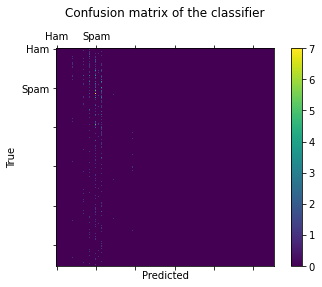

In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['Ham','Spam']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion matrix of the classifier\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [149]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [150]:
# your code here

# SUMMARY

Your summary here.